<a href="https://colab.research.google.com/github/kamran-py/regressions/blob/master/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# PART(A):

np.random.seed(0)

In [3]:
# i. Generate a sequence of T=100 i.i.d. standard normal random variables
e = np.random.normal(0, 1, 100)

In [4]:
# ii Generate a sequence of T=100 i.i.d. standard normal random variables
a = np.random.normal(0, 1, 100)

In [5]:
# Set values for Y and X

Y = np.empty(100)
X = np.empty(100)
Y[0] = e[0]
X[0] = a[0]

In [7]:
# Construct Y and X

for t in range(1, 100):
  Y[t] = Y[t-1] + e[t]
  X[t] = X[t-1] + a[t]

In [8]:
# iii. Regress Y onto a constant and X, compute OLS estimator, regression R^2, t-statistic

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

r_squared = model.rsquared
t_statistic = model.tvalues[1] # t-value for the coefficient on X1
p_value = model.pvalues[1] #p-value for the hypothesis test that beta_1 = 0

In [11]:
print(r_squared)
print(t_statistic)
print(p_value)

0.019481229737508543
1.3953824801933352
0.16605449646421488


In [12]:
# PART(B): Repeat the algorithm 1000 times for R^2 and t-stat

np.random.seed(0) # reset the seed for reproducibility in the simulation

In [13]:
# Initialize lists to store R^2 values and t-statistics

r_squared_values = []
t_statistics = []

In [14]:
# Run the simulation 1000 times

for _ in range(1000):
  e = np.random.normal(0, 1, 100)
  a = np.random.normal(0, 1, 100)
  Y = np.empty(100)
  X = np.empty(100)
  Y[0] = e[0]
  X[0] = a[0]

  for t in range(1, 100):
    Y[t] = Y[t-1] + e[t]
    X[t] = X[t-1] + a[t]


  X = sm.add_constant(X)
  model = sm.OLS(Y, X).fit()
  r_squared_values.append(model.rsquared)
  t_statistics.append(model.tvalues[1])

In [15]:
# Convert lists to numpy arrays for calculation of percentiles

r_squared_values = np.array(r_squared_values)
t_statistics = np.array(t_statistics)

In [16]:
# Calculate percentiles for R^2 and t-statistic

r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
t_statistic_percentiles = np.percentile(t_statistics, [5, 50, 95])

In [18]:
# Calculate the fraction of t-statistics exceeding the critical value in absolute value

t_statistic_critical_value_fraction = np.mean(np.abs(t_statistics) > 1.96)
r_squared_percentiles, t_statistic_percentiles, t_statistic_critical_value_fraction

(array([0.00172202, 0.18093661, 0.72403093]),
 array([-12.67528314,   0.02157577,  11.95581314]),
 np.float64(0.775))

In [19]:
# Define a function to create histograms for R^2 and t-statistics

def create_histograms(r_squared, t_stats, bins=50):
  # Create histograms
  fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  # Histogram for R^2 values
  ax[0].hist(r_squared, bins=bins, color='skyblue', edgecolor='black')
  ax[0].set_title('Histogram of R^2 values')
  ax[0].set_xlabel('R^2 value')
  ax[0].set_ylabel('Frequency')
  # Histogram for t-statistics
  ax[1].hist(t_stats, bins=bins, color='salmon', edgecolor='black')
  ax[1].set_title('Histogram of t-statistics')
  ax[1].set_xlabel('t-statistic value')
  ax[1].set_ylabel('Frequency')
  # Show the plots
  plt.tight_layout()
  plt.show()

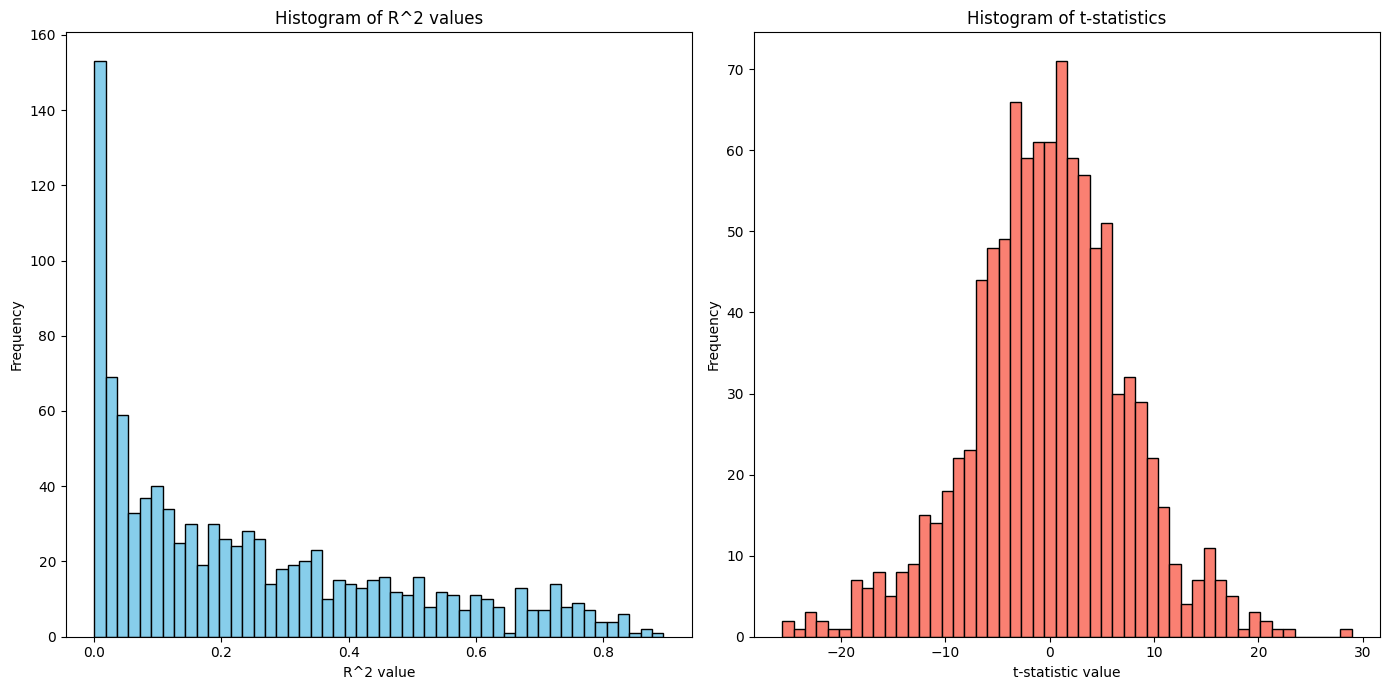

In [20]:
# Create histograms for the values obtained in part (b)
create_histograms(r_squared_values, t_statistics)

In [26]:
# PART (C) The simulation for T=50 to calculate the quantiles for R^2 and t-statistics

T = 50
np.random.seed(0)

# Initialize lists to store R^2 values and t-statistics for T=50
r_squared_values_T50 = []
t_statistics_T50 = []

In [27]:
# Run the simulation 1000 times for T=50:

for _ in range(1000):
  e = np.random.normal(0, 1, T)
  a = np.random.normal(0, 1, T)
  Y = np.empty(T)
  X = np.empty(T)
  Y[0] = e[0]
  X[0] = a[0]

  for t in range(1, T):
    Y[t] = Y[t-1] + e[t]
    X[t] = X[t-1] + a[t]

  X = sm.add_constant(X)
  model = sm.OLS(Y, X).fit()
  r_squared_values_T50.append(model.rsquared)
  t_statistics_T50.append(model.tvalues[1])

In [28]:
# Convert lists to numpy arrays for calculation of percentiles

r_squared_values_T50 = np.array(r_squared_values_T50)
t_statistics_T50 = np.array(t_statistics_T50)

In [29]:
# Calculate percentiles for R^2 and t-statistic for T=50

r_squared_percentiles_T50 = np.percentile(r_squared_values_T50, [5, 50, 95])
t_statistic_percentiles_T50 = np.percentile(t_statistics_T50, [5, 50, 95])

In [30]:
# Calculate the fraction of t-statistics exceeding the critical value in absolute value for T=50

t_statistic_critical_value_fraction_T50 = np.mean(np.abs(t_statistics_T50) > 1.96)

In [31]:
r_squared_percentiles_T50, t_statistic_percentiles_T50, t_statistic_critical_value_fraction_T50

(array([0.00239348, 0.19363224, 0.73795637]),
 array([-8.66837998,  0.24485683,  9.85722853]),
 np.float64(0.692))

In [32]:
# simulation for T=200

T = 200
np.random.seed(0) # reset the seed for reproducibility

In [33]:
# Initialize lists to store R^2 values and t-statistics for T=200

r_squared_values_T200 = []
t_statistics_T200 = []

In [34]:
# Run the simulation 1000 times for T=200

for _ in range(1000):
  e = np.random.normal(0, 1, T)
  a = np.random.normal(0, 1, T)
  Y = np.empty(T)
  X = np.empty(T)
  Y[0] = e[0]
  X[0] = a[0]

  for t in range(1, T):
    Y[t] = Y[t-1] + e[t]
    X[t] = X[t-1] + a[t]

  X = sm.add_constant(X)
  model = sm.OLS(Y, X).fit()
  r_squared_values_T200.append(model.rsquared)
  t_statistics_T200.append(model.tvalues[1])

In [35]:
# Convert lists to numpy arrays for calculation of percentiles

r_squared_values_T200 = np.array(r_squared_values_T200)
t_statistics_T200 = np.array(t_statistics_T200)

In [36]:
# Calculate percentiles for R^2 and t-statistic for T=200

r_squared_percentiles_T200 = np.percentile(r_squared_values_T200, [5, 50, 95])
t_statistic_percentiles_T200 = np.percentile(t_statistics_T200, [5, 50, 95])

In [37]:
# Calculate the fraction of t-statistics exceeding the critical value in absolute value for T=200

t_statistic_critical_value_fraction_T200 = np.mean(np.abs(t_statistics_T200) > 1.96)

In [38]:
r_squared_percentiles_T200, t_statistic_percentiles_T200, t_statistic_critical_value_fraction_T200

(array([0.00120863, 0.1543218 , 0.70512796]),
 array([-17.46972103,   0.11753707,  16.35123885]),
 np.float64(0.833))